# Prepaid Plans: Analyzing client behaviour to determine the phone plan that is more profitable

This project is done on behalf of the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

A preliminary analysis of the plans would be carried out with data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. We would 
analyze the clients' behavior and determine which prepaid plan brings in more revenue. Also, we would test the statistical hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs using null and alternate hypotheses.


### Description of the Data

**The users table (data on users):**

- `first_name`: user's name
- `last_name`: user's last name
- `age`: user's age (years)
- `reg_date`: subscription date (dd, mm, yy)
- `churn_date`: the date the user stopped using the service 
- `city`: user's city of residence
- `plan`: calling plan name
- `user_id`: unique user identifier


**The calls table (data on calls):**

- `id`: unique call identifier
- `call_date`: call date
- `duration`: call duration (in minutes)
- `user_id`: the identifier of the user making the call

**The message table (data on texts):**

- `id`: unique text message identifier
- `message_date`: text message date
- `user_id`: the identifier of the user sending the text

**The internet table (data on web sessions):-**

- `id`: unique session identifier
- `mb_used`: the volume of data spent during the session (in megabytes)
- `session_date`: web session date
- `user_id`: user identifier

**The plans table (data on the plans):**

- `plan_name`: calling plan name
- `usd_monthly_fee`: monthly charge in US dollars
- `minutes_included`: monthly minute allowance
- `messages_included`: monthly text allowance
- `mb_per_month_included`: data volume allowance (in megabytes)
- `usd_per_minute`: price per minute after exceeding the package limits 
- `usd_per_message`: price per text after exceeding the package limits
- `usd_per_gb`: price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

## General Information

Importing the nescessary libraries

In [1]:
# Loading all the libraries
from scipy import stats as st
from math import factorial
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Next, the several datasets are loaded into different dataframes

In [2]:
# Load the data files into different DataFrames
df_meg_calls = pd.read_csv("/datasets/megaline_calls.csv")

df_meg_internet = pd.read_csv("/datasets/megaline_internet.csv")

df_meg_messages = pd.read_csv("/datasets/megaline_messages.csv")

df_meg_plans = pd.read_csv("/datasets/megaline_plans.csv")

df_meg_users = pd.read_csv("/datasets/megaline_users.csv")

Next, we prepare the data. The data for this project is split into several tables. Each one will be explored to get an initial understanding of the data, and necessary corrections will be made to the table.

## Plans

Getting a general information about the various Phone plans in Megaline's Network 

In [3]:
# Getting the general information about the plans' DataFrame

df_meg_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Printing a sample of data for plans

df_meg_plans.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The column "mb_per_month" has to be converted from megabytes to gigabytes

1024MB = 1GB

In [5]:
#Converting from Megabyte to Gigabyte
df_meg_plans["mb_per_month_included"] = df_meg_plans["mb_per_month_included"] / 1024

#Rounding up the values 

df_meg_plans["mb_per_month_included"]= df_meg_plans["mb_per_month_included"].apply(np.ceil).astype("int")

#Renaming the column 
df_meg_plans = df_meg_plans.rename(columns = {"mb_per_month_included":"gb_per_month_included"})

df_meg_plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Users

This table stores information about the users

In [6]:
# Getting the general information about the users' DataFrame

df_meg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users

df_meg_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
df_meg_users[df_meg_users["churn_date"].isna()].shape[0]

466

All the columns in the Users' table have 500 rows except the "churn" column. The "churn" column has 34 filled rows, the rest have missing values. Also, the "reg_date" and "churn_date", and "plan" columns have the wrong datatypes. The "reg_date" and "churn_date" are to be changed from object to datetime, while the "plan" column will be changed from "object" to "category"

Converting the "Plan" column from object to category

In [9]:
df_meg_users["plan"] = df_meg_users["plan"].astype("category")

### Fixing the reg_date and churn_date columns

These columns have object type values. They are to be changed to datetime. The to_datetime() method will be used.

In [10]:
#Putting the "reg_date" column in the right format
df_meg_users["reg_date"] = pd.to_datetime(df_meg_users["reg_date"], format = "%Y-%m-%d")

#Putting the "churn_date" column in the right format
df_meg_users["churn_date"] = pd.to_datetime(df_meg_users["churn_date"], format = "%Y-%m-%d")

Adding datetime value to the "reg_date" column to show the days when the phone plans from Megaline were purchased

In [11]:
df_meg_users["reg_date_day"] = df_meg_users["reg_date"].dt.day_name()

The "churn_date" is the date when users decided to end their subscription. So, the **Nan** values indicate that  the subscription is ongoing. Therefore, all the **Nan** values would be changed to "no info"

In [12]:
df_meg_users["churn_date"] = df_meg_users["churn_date"].fillna("no info")

In [13]:
df_meg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       500 non-null    int64         
 1   first_name    500 non-null    object        
 2   last_name     500 non-null    object        
 3   age           500 non-null    int64         
 4   city          500 non-null    object        
 5   reg_date      500 non-null    datetime64[ns]
 6   plan          500 non-null    category      
 7   churn_date    500 non-null    object        
 8   reg_date_day  500 non-null    object        
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 32.0+ KB


In [14]:
df_meg_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_date_day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,no info,Monday
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,no info,Monday
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,no info,Sunday
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,no info,Sunday
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,no info,Wednesday


## Calls

The "calls" table gives information made by each user

In [15]:
# Getting the summary information about the calls' DataFrame

df_meg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Printing a sample of data for calls

df_meg_calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The "call_date" column is displayed as an object. That has to be changed to datetime. Also, the values of the call duration will be rounded up.

In [17]:
#Using the to_datetime() method to put the "call_date" column in the right format

df_meg_calls["call_date"] = pd.to_datetime(df_meg_calls["call_date"], format = "%Y-%m-%d")

Adding datetime value to the "call_date" to show the days and months the user made phone calls.

In [18]:
df_meg_calls["day"] = df_meg_calls["call_date"].dt.day_name()

df_meg_calls["month"] = df_meg_calls["call_date"].dt.month_name()

An extra column "year_month" will be added to the df_meg_calls table to be able to differentiate the months for different years. This is done in case data needs to be aggregated by months, and the data is not within a one year period

In [19]:
df_meg_calls['year_month'] = df_meg_calls['call_date'].apply(lambda x: str(x)[:7])

In [20]:
df_meg_calls.head(5)

,id,user_id,call_date,duration,day,month,year_month
0,1000_93,1000,2018-12-27,8.52,Thursday,December,2018-12
1,1000_145,1000,2018-12-27,13.66,Thursday,December,2018-12
2,1000_247,1000,2018-12-27,14.48,Thursday,December,2018-12
3,1000_309,1000,2018-12-28,5.76,Friday,December,2018-12
4,1000_380,1000,2018-12-30,4.22,Sunday,December,2018-12


Rounding up the values of the call duration

In [21]:
#Rounding up the call values, and converting the values to strings
df_meg_calls['duration'] = df_meg_calls['duration'].apply(np.ceil).astype("int")

#Or df_meg_calls['duration'] = np.ceil(calls['duration'])

In [22]:
df_meg_calls.head(5)

,id,user_id,call_date,duration,day,month,year_month
0,1000_93,1000,2018-12-27,9,Thursday,December,2018-12
1,1000_145,1000,2018-12-27,14,Thursday,December,2018-12
2,1000_247,1000,2018-12-27,15,Thursday,December,2018-12
3,1000_309,1000,2018-12-28,6,Friday,December,2018-12
4,1000_380,1000,2018-12-30,5,Sunday,December,2018-12


## Messages

This table stores information about the messages sent by each user

In [23]:
# Getting the general information about the DataFrame

df_meg_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
df_meg_messages.head()



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The "message_date" column is displayed as an object. That has to be changed to datetime.

In [25]:
#Using the to_datetime() method to put the "message_date" column in the right format

df_meg_messages["message_date"] = pd.to_datetime(df_meg_messages["message_date"], format = "%Y-%m-%d")


Adding a column to show the days and months that messages were sent

In [26]:
#Days that messages were sent
df_meg_messages["day"] = df_meg_messages["message_date"].dt.day_name()

#Months that messages were sent
df_meg_messages["month"] = df_meg_messages["message_date"].dt.month_name()

In [27]:
df_meg_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   day           76051 non-null  object        
 4   month         76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


In [28]:
df_meg_messages.head()

,id,user_id,message_date,day,month
0,1000_125,1000,2018-12-27,Thursday,December
1,1000_160,1000,2018-12-31,Monday,December
2,1000_223,1000,2018-12-31,Monday,December
3,1000_251,1000,2018-12-27,Thursday,December
4,1000_255,1000,2018-12-26,Wednesday,December


## Internet

This table stores information about the Internet usage

In [29]:
# Getting a general information about the internet DataFrame

df_meg_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
# Printing a sample of data for the internet traffic

df_meg_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The "session_date" column is displayed as an object. That has to be changed to datetime.

In [31]:
#Using the to_datetime() method to put the "session_date" column in the right format

df_meg_internet["session_date"] = pd.to_datetime(df_meg_internet["session_date"], format = "%Y-%m-%d")


Adding a column to show the months for the Internet sessions

In [32]:
df_meg_internet["month"] = df_meg_internet["session_date"].dt.month_name()


Converting the monthly internet usage from megabytes to gigabytes, and rounding up the values.
1024MB = 1GB

In [33]:
df_meg_internet.head(5)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


In [34]:
df_meg_internet = df_meg_internet.pivot_table(index = ["user_id", "month"], values = "mb_used", aggfunc = "sum").reset_index()

df_meg_internet.head(5)

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49


In [35]:
#Converting the monthly data usage to gigabytes

df_meg_internet["mb_used"] = df_meg_internet["mb_used"] / 1024

#Rounding up the values
df_meg_internet["mb_used"] = np.ceil(df_meg_internet["mb_used"])

#Converting from float to integer
df_meg_internet["mb_used"] = df_meg_internet["mb_used"].astype("int")

#Changing the name of the columns

df_meg_internet.columns = ["user_id", "month", "gb_used"]

df_meg_internet.head(5)



,user_id,month,gb_used
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22


In [36]:
df_meg_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2277 non-null   int64 
 1   month    2277 non-null   object
 2   gb_used  2277 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.5+ KB


## Aggregating data per user

In [37]:
# Calculating the number of calls made by each user per month.

calls_per_month = df_meg_calls.pivot_table(
    index= ["user_id", "month"],
    values='id',
    aggfunc='count').reset_index()

#Renaming the column id

calls_per_month = calls_per_month.rename(columns = {"id":"calls_per_month"})

calls_per_month

,user_id,month,calls_per_month
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
...,...,...,...
2253,1498,September,45
2254,1499,December,65
2255,1499,November,45
2256,1499,October,53


In [38]:
# Calculating the amount of minutes spent on phone calls by each user per month.

calls_mins_per_month = df_meg_calls.pivot_table(
    index= ["user_id", "month"],
    values='duration',
    aggfunc= "sum").reset_index()

#Alternatively the count, and sum of the minutes by each user per month can be calculated with this code
# data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

#Renaming the duration column
calls_mins_per_month = calls_mins_per_month.rename(columns = {"duration":"mins_per_month"})

calls_mins_per_month

,user_id,month,mins_per_month
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393
...,...,...,...
2253,1498,September,363
2254,1499,December,496
2255,1499,November,308
2256,1499,October,385


In [39]:
# Calculating the number of messages sent by each user per month.

no_msgs_per_month = df_meg_messages.pivot_table(
    index= ["user_id", "month"],
    values='id',
    aggfunc='count').reset_index()

#Renaming the column id to msg_per_month
no_msgs_per_month = no_msgs_per_month.rename(columns = {"id":"msg_per_month"})

no_msgs_per_month

,user_id,month,msg_per_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


**Volume of Data Used per Month**

In [40]:
df_meg_internet.head()

,user_id,month,gb_used
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22


The volume of internet data consumed per month per user has been calculated already. All that will be done here will be to rename the column "gb_used" to "monthly_data".

In [41]:
#Renaming the column id to monthly_data
monthly_int_vol = df_meg_internet.rename(columns = {"gb_used":"monthly_data"})

monthly_int_vol

,user_id,month,monthly_data
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22
...,...,...,...
2272,1498,September,23
2273,1499,December,22
2274,1499,November,17
2275,1499,October,20


**Aggregating the data into one Dataframe, so that each record would represent what a unique user consumes in a given month**

Merging Monthly records for each user

In [42]:
#Merging the tables calls_per_month, and calls_mins_per_month  

calls_and_mins = calls_per_month.merge(calls_mins_per_month, on=["user_id", "month"], how="outer")


calls_and_mins


,user_id,month,calls_per_month,mins_per_month
0,1000,December,16,124
1,1001,August,27,182
2,1001,December,56,412
3,1001,November,64,426
4,1001,October,65,393
...,...,...,...,...
2253,1498,September,45,363
2254,1499,December,65,496
2255,1499,November,45,308
2256,1499,October,53,385


In [43]:
#Checking the dimension of the tables after merging
print(calls_and_mins.shape, calls_per_month.shape) 
print(calls_mins_per_month.shape)


(2258, 4) (2258, 3)
(2258, 3)


calls_per_month and calls_mins_per_month both have 2258 rows and 3 columns. However, after they were merged, the resulting table, calls_and_mins has 2258 rows, and 4 columns

In [44]:
#Merging the tables calls_and_mins, and no_msgs_per_month
#That is Merging calls_per_month, and calls_mins_per_month and no_msgs_per_month
calls_mins_msgs = calls_and_mins.merge(no_msgs_per_month, on=["user_id", "month"], how="outer")

#print(calls_mins_msgs.shape)

calls_mins_msgs



,user_id,month,calls_per_month,mins_per_month,msg_per_month
0,1000,December,16.0,124.0,11.0
1,1001,August,27.0,182.0,30.0
2,1001,December,56.0,412.0,44.0
3,1001,November,64.0,426.0,36.0
4,1001,October,65.0,393.0,53.0
...,...,...,...,...,...
2286,1349,December,NaN,NaN,61.0
2287,1349,November,NaN,NaN,72.0
2288,1349,October,NaN,NaN,76.0
2289,1361,May,NaN,NaN,2.0


In [45]:
#Checking the dimension of the tables after merging
print(calls_and_mins.shape, no_msgs_per_month.shape)
print(calls_mins_msgs.shape)

(2258, 4) (1806, 3)
(2291, 5)


The table calls_and_mins has 2258 rows, and 4 columns. The table no_msgs_per_month has 1806 rows  3 columns. After merging both tables, the resulting table, calls_mins_msgs has 2291 rows, and 5 columns. 
We have an increase in the total number of rows in calls_mins_msgs to 2291, because we have users from no_msgs_per_month that only sent messages for specific months, and did not make any calls.

In [46]:
#Merging the tables calls_per_month, and calls_mins_per_month, no_msgs_per_month, and monthly_int_vol 
#That is Merging calls_mins_msgs and monthly_int_vol

calls_mins_msgs_intvol = calls_mins_msgs.merge(monthly_int_vol, on=["user_id", "month"], how="outer")

calls_mins_msgs_intvol


,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data
0,1000,December,16.0,124.0,11.0,2.0
1,1001,August,27.0,182.0,30.0,7.0
2,1001,December,56.0,412.0,44.0,19.0
3,1001,November,64.0,426.0,36.0,19.0
4,1001,October,65.0,393.0,53.0,22.0
...,...,...,...,...,...,...
2288,1349,October,NaN,NaN,76.0,13.0
2289,1361,May,NaN,NaN,2.0,2.0
2290,1482,October,NaN,NaN,2.0,NaN
2291,1108,December,NaN,NaN,NaN,1.0


In [47]:
#Checking the dimension of the tables after merging
print(calls_mins_msgs.shape, monthly_int_vol.shape)
print(calls_mins_msgs_intvol.shape)

(2291, 5) (2277, 3)
(2293, 6)


After merging both tables, the resulting table, calls_mins_msgs_intvol has 2293 rows, and 6 columns. We have an increase in the total number of rows in calls_mins_msgs_intvol to 2293, because we have users from the monthly_int_vol table that only used internet data for specific months, and did not make any calls or send messages. Actually from our dataset, there are only two of such instances.

Also, the Nan values will be changed to 0

In [48]:
#Filling all Nan Values with 0
calls_mins_msgs_intvol["calls_per_month"] = calls_mins_msgs_intvol["calls_per_month"].fillna(0)

calls_mins_msgs_intvol["mins_per_month"] = calls_mins_msgs_intvol["mins_per_month"].fillna(0)

calls_mins_msgs_intvol["msg_per_month"] = calls_mins_msgs_intvol["msg_per_month"].fillna(0)

calls_mins_msgs_intvol["monthly_data"] = calls_mins_msgs_intvol["monthly_data"].fillna(0)


calls_mins_msgs_intvol

,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data
0,1000,December,16.0,124.0,11.0,2.0
1,1001,August,27.0,182.0,30.0,7.0
2,1001,December,56.0,412.0,44.0,19.0
3,1001,November,64.0,426.0,36.0,19.0
4,1001,October,65.0,393.0,53.0,22.0
...,...,...,...,...,...,...
2288,1349,October,0.0,0.0,76.0,13.0
2289,1361,May,0.0,0.0,2.0,2.0
2290,1482,October,0.0,0.0,2.0,0.0
2291,1108,December,0.0,0.0,0.0,1.0


In [49]:
#Merging the tables calls_mins_msgs_intvol, with the plan information

df_users = df_meg_users[["user_id", "first_name", "last_name", "city", "plan"]]

df_monthly_data = calls_mins_msgs_intvol.merge(df_users, on="user_id",  how="left")

df_monthly_data


,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data,first_name,last_name,city,plan
0,1000,December,16.0,124.0,11.0,2.0,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,August,27.0,182.0,30.0,7.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,December,56.0,412.0,44.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,November,64.0,426.0,36.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,October,65.0,393.0,53.0,22.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...,...,...
2288,1349,October,0.0,0.0,76.0,13.0,Florentina,Diaz,"Boston-Cambridge-Newton, MA-NH MSA",surf
2289,1361,May,0.0,0.0,2.0,2.0,Jacelyn,Hoffman,"Birmingham-Hoover, AL MSA",surf
2290,1482,October,0.0,0.0,2.0,0.0,Armand,Glenn,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate
2291,1108,December,0.0,0.0,0.0,1.0,Porfirio,Kane,"Salt Lake City, UT MSA",ultimate


In [50]:
#Checking the dimension of the tables
print(df_users.shape, calls_mins_msgs_intvol.shape )

print(df_monthly_data.shape)

(500, 5) (2293, 6)
(2293, 10)


In [51]:
print( df_monthly_data[df_monthly_data['plan'].isnull()].shape )

(0, 10)


**Monthly revenue generated from each user**

For the calculation of the monthly revenue, we will be looking at several columns, namely: "calls_per_month", "mins_per_month", "msg_per_month", "monthly_data"

In [52]:
#A function is created called monthly_revenue
def monthly_revenue(row):
            
    mins = 0
    msgs = 0
    data_int = 0
    baseplan_surf = 20
    baseplan_ultimate = 70
    
    plan = row["plan"] #create a variable named plan which will take the value of the plan column from
                       #the rows
    #Conditional statement
    if plan == "surf": #if the plan of the customer is "surf"
        
        #conditional statement
        if row["mins_per_month"] > 500:
        #if the value for the "mins_per_month" column exceeds 500
            
            mins = row["mins_per_month"] - 500
            #min_extra will take the value of the mins_per_month subtracted from the package limit for surf
        else:
             mins = 0
            
        #conditional statement    
        if row["msg_per_month"] > 50:
        #if the value of "msg_per_month" exceeds 50    
            
            msgs = row["msg_per_month"] - 50
            #msgs_extra will take the value of the msg_per_month subtracted from 50
        else:
             msgs = 0
        
        #conditional statement
        if row["monthly_data"] > 15:
        #if the value of monthly_data is greater than 15
        
            data_int = row["monthly_data"] - 15
            #data_int will take the value of the monthly data subtracted from 15
        else:
            data_int = 0
            
            
        total_profit = (mins * .03) + (msgs * .03) + (data_int * 10) + baseplan_surf
        #profit_surf calculation on the "surf" plan, which is saved to total_profit    
        
        #Conditional statement
    elif plan == "ultimate": #if the plan of the customer is "ultimate"
        
        #conditional statement
        if row["mins_per_month"] > 3000:
        #if the value for the "mins_per_month" column exceeds 3000
        
            mins = row["mins_per_month"] - 3000
            #mins will take the value of the mins_per_month subtracted from the package limit for 
            #ultimate
        else:
            mins = 0
          
        #conditional statement    
        if row["msg_per_month"] > 1000:
        #if the value of "msg_per_month" exceeds 1000               
            
            msgs = row["msg_per_month"] - 1000
            #msgs will take the value of the msg_per_month subtracted from 1000
        else:
            msgs = 0
              
         
        #conditional statement
        if row["monthly_data"] > 30:
        #if the monthly_data is greater than 30
        
            data_int = row["monthly_data"] - 30
            #data_int will take the value of the monthly data subtracted from 30
        else:
            data_int = 0
            
        total_profit = (mins * .03) + (msgs * .03) + (data_int * 7) + baseplan_ultimate
        #Profit calculation on the "ultimate" plan, which is saved to total_profit  
        
    return total_profit #returns the value of the profit variable

df_monthly_data["monthly_profit"] = df_monthly_data.apply(monthly_revenue, axis = 1)
 
df_monthly_data.head(5)

,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data,first_name,last_name,city,plan,monthly_profit
0,1000,December,16.0,124.0,11.0,2.0,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,August,27.0,182.0,30.0,7.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,December,56.0,412.0,44.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
3,1001,November,64.0,426.0,36.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
4,1001,October,65.0,393.0,53.0,22.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09


## Analyzing the behaviour of users

Assigning numeric values to the months, so that they are arranged in order 

In [53]:
df_monthly_data['month'] =  pd.to_datetime(df_monthly_data['month'], format='%B').dt.month

In [54]:
df_monthly_data['month']

0       12
1        8
2       12
3       11
4       10
        ..
2288    10
2289     5
2290    10
2291    12
2292     6
Name: month, Length: 2293, dtype: int64

### Calls

**Analysis of the Phone calls made by users using different plans** 

In [55]:
# Comparing the average duration of calls per each plan per each distinct month.

df_monthly_data.pivot_table(index = "month", columns = "plan",
                            values = "mins_per_month", aggfunc = "mean")




plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


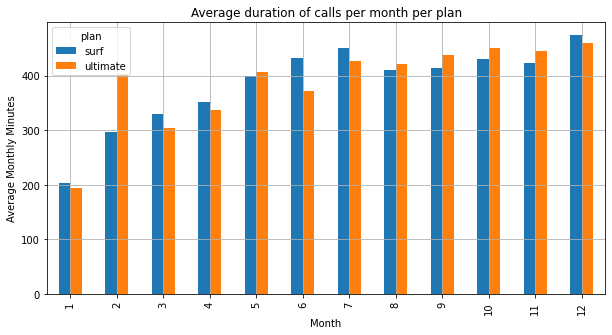

In [56]:
#Plotting a bar plot to visualize the average duration of calls per plan per month

df_monthly_data.pivot_table(index = "month", columns = "plan",
                            values = "mins_per_month",
                            aggfunc = "mean").plot(kind = "bar", grid = True, figsize = (10, 5))
plt.title("Average duration of calls per month per plan")
plt.xlabel("Month")
plt.ylabel("Average Monthly Minutes")
plt.show()

The average monthly minutes for phone calls in 2018 was lowest in January, and increased gradually until July. After which the average monthly minutes remained somewhat constant and finally peaked in December. The users of the surf plan spent more time calling in December than users on the ultimate plan.

**Analysis on the number of minutes spent on calls for surf users per Month**

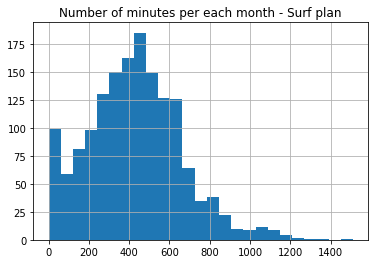

In [57]:
#Getting the data for users with "surf" plans

surf_cut = df_monthly_data.query('plan == "surf"')

#Plotting a Histogram
surf_cut["mins_per_month"].hist(bins = 25)

plt.title("Number of minutes per each month - Surf plan")

plt.show()

In [58]:
#Calculating the variance of the "mins per month" column for the "surf" plan

np.var(surf_cut["mins_per_month"])


54933.334591317485

The mean and the standard deviation can both be found using the describe method

In [59]:
surf_cut["mins_per_month"].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: mins_per_month, dtype: float64

The durations of the calls for most users on the surf plan, is between 200 and 600 with a peak around 450. Also, the median, and the mean are quite close, which shows that the histogram is normally distributed. However, we can see some outliers to the right. 

**Analysis on the number of minutes spent on calls for "ultimate" users per Month**

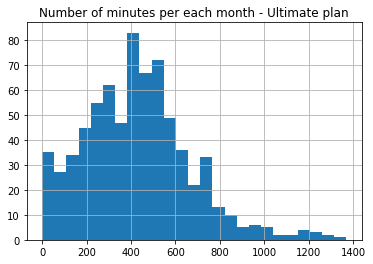

In [60]:
#Getting the data for users with "ultimate" plans

ultimate_cut = df_monthly_data.query('plan == "ultimate"')

#Plotting a Histogram
ultimate_cut["mins_per_month"].hist(bins = 25)

plt.title("Number of minutes per each month - Ultimate plan")

plt.show()

In [61]:
# Calculating the mean and the variance for users of the "ultimate" plan 

#calculating the variance of the duration of the mins per month for the "surf" plan

np.var(ultimate_cut["mins_per_month"])


57764.12527777777

To get the mean and standard deviation of the users making use of the ultimate plan, we use the describe() method

In [62]:
ultimate_cut["mins_per_month"].describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: mins_per_month, dtype: float64

The duration of the calls for most users on the ultimate plan, is between 300 and 550 with a peak around 400. There are outliers to the right, which shows that the histogram is positively skewed. Also, taking a look at the mean, it is higher than the median, which supports the fact that the histogram is postively skewed.

The outliers that are found for users on the ultimate plan is much more than those on the surf plan.

In [63]:
 #Filtering df_monthly_data to get all the users using the surf plan and 
users_surf_calls = df_monthly_data[df_monthly_data["plan"] == "surf"]

users_surf_calls.head(2)

,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data,first_name,last_name,city,plan,monthly_profit
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.0
2,1001,12,56.0,412.0,44.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.0


<AxesSubplot:title={'center':'mins_per_month'}, xlabel='month'>

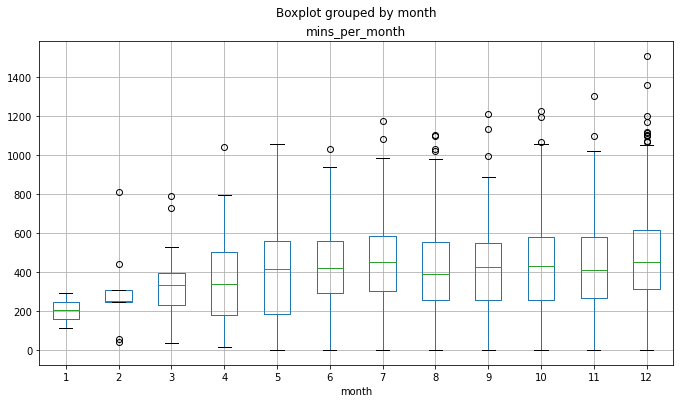

In [64]:
# Plotting a boxplot to visualize the distribution of the monthly call duration for those using the "surf" plan

users_surf_calls.boxplot(column = "mins_per_month" , by = "month"  , figsize = (11, 6))
    

From the box plot, the total number of minutes spent per month on calls was highest in December and lowest in January for users on the surf plan.

<AxesSubplot:title={'center':'mins_per_month'}, xlabel='month'>

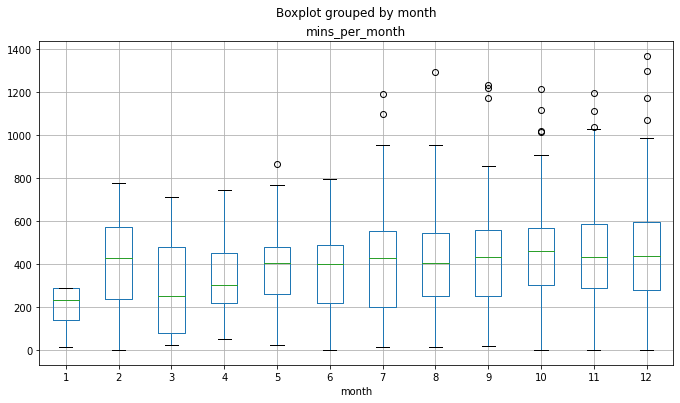

In [65]:
# Plotting a boxplot to visualize the distribution of the monthly call duration for those using the "ultimate" plan

(df_monthly_data.query('plan == "ultimate"')).boxplot(column = "mins_per_month" , by = "month"  , figsize = (11, 6))
    

The behavior of users on the ultimate plan is quite similar to users on the surf plan. The number of minutes spent on calls is lowest in January, and highest in December.

### Messages

In [66]:
# Comparing the average number of messages per each plan per each month.

df_monthly_data.pivot_table(index = "month", columns = "plan", values = "msg_per_month", aggfunc = "mean" )


plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


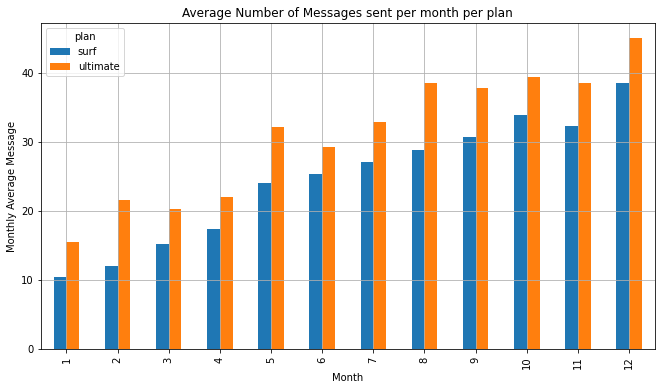

In [67]:
#Plotting a bar plot to visualize the average number of messages 

df_monthly_data.pivot_table(index = "month", columns = "plan", values = "msg_per_month",
                            aggfunc = "mean" ).plot(kind = "bar", grid = True, figsize = (11, 6))

plt.title("Average Number of Messages sent per month per plan")
plt.ylabel("Monthly Average Message")
plt.xlabel("Month")
plt.show()


The average monthly messages sent by users in 2018 was lowest in January, and increased gradually until December which was the highest. In all the months however, the users on the ultimate plan sent more messages than users on the surf plan. 

**Analysis on the number of messages sent per Month for users on the Surf plan**

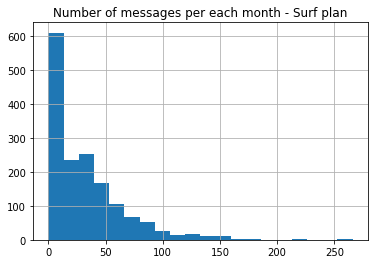

In [68]:
# Showing the number of messages users of the surf plan tend to send each month
# Getting the data for users on the surf plan 

surf_cut = df_monthly_data.query('plan == "surf"')

#Plotting a Histogram
surf_cut["msg_per_month"].hist(bins = 20)

plt.title("Number of messages per each month - Surf plan")

plt.show()



In [69]:
#Calculating the variance of the number of messages sent per month for users on the "surf" plan

np.var(surf_cut["msg_per_month"])


1126.008231726662

In [70]:
#Calculating the mean and the standard deviation 
surf_cut["msg_per_month"].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: msg_per_month, dtype: float64

A steady decrease is observed, with the peak ranging from 0 to about 10 messages in a month. So, more people text less, and less people text more. The distribution is positively skewed. Also, there are outlier values as high as 260 

**Analysis on the number of messages sent per Month for users on the Ultimate plan**

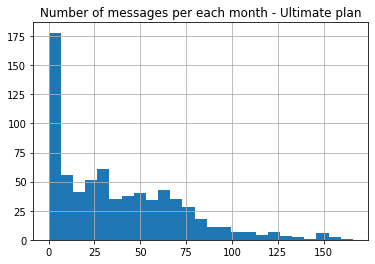

In [71]:
# Getting the data for users on the ultimate plan 

ultimate_cut = df_monthly_data.query('plan == "ultimate"')

#Plotting a Histogram
ultimate_cut["msg_per_month"].hist(bins = 25)

plt.title("Number of messages per each month - Ultimate plan")

plt.show()

In [72]:
#Calculating the variance of the number of messages sent per month for users on the "Ultimate" plan

np.var(ultimate_cut["msg_per_month"])

1207.0779147376545

In [73]:
#Calculating the mean and the standard deviation 
ultimate_cut["msg_per_month"].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: msg_per_month, dtype: float64

Similar to the surf plan, a steady decrease is observed, with the peak ranging from 0 to about 10 messages in a month. So, more people text less, and less people text more. The distribution is positively skewed. Also, there are outlier values as high as 260

<AxesSubplot:title={'center':'msg_per_month'}, xlabel='month'>

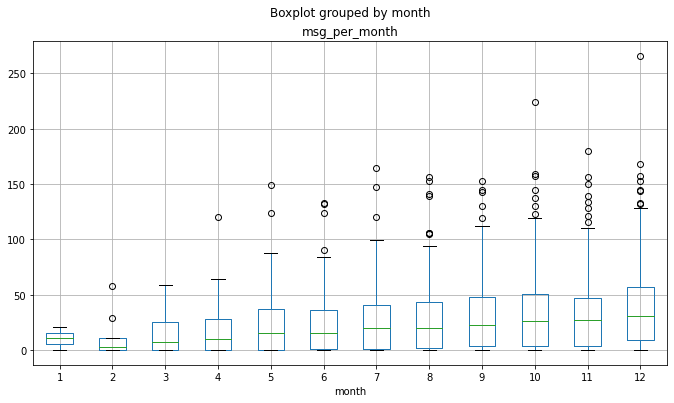

In [74]:
# Plotting a boxplot to visualize the distribution of the number of messages
#sent monthly for users on the "surf" plan

(df_monthly_data.query('plan == "surf"')).boxplot(column = "msg_per_month" , by = "month"  , figsize = (11, 6))
    

The number of messages sent by users on the surf plan per month is lowest in February. It increased steadily and peaked in December

<AxesSubplot:title={'center':'msg_per_month'}, xlabel='month'>

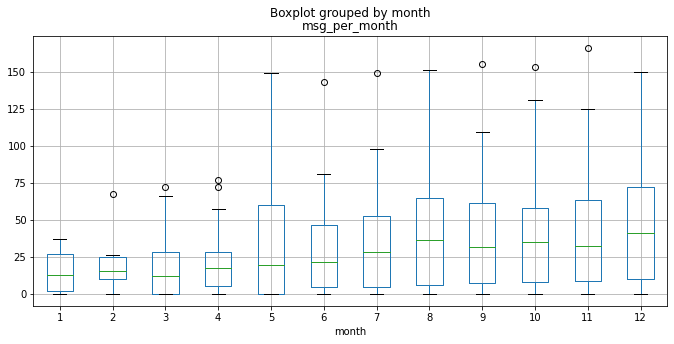

In [75]:
# Plotting a boxplot to visualize the distribution of the number of messages sent monthly
#for users on the "ultimate" plan

(df_monthly_data.query('plan == "ultimate"')).boxplot(column = "msg_per_month", by = "month", figsize = (11, 5))

The behavior of users on the ultimate plan is quite similar to users on the surf plan. The number of messages sent by users on the ultimate plan per month is lowest in February. However, the increase over the months was not steady like the surf plan. The highest month recorded for messages sent by users on the ultimate plan was in December.

### Internet

In [76]:
# Comparing the average number of internet traffic consumed by users per each plan per each distinct month.

df_monthly_data.pivot_table(index = "month", columns = "plan", values = "monthly_data", aggfunc = "mean" )


plan,surf,ultimate
month,,
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.220000,16.333333
5,14.116883,16.862069
6,15.484536,15.425532
7,16.876033,16.491525
8,16.882716,17.845070
9,16.690722,17.011628


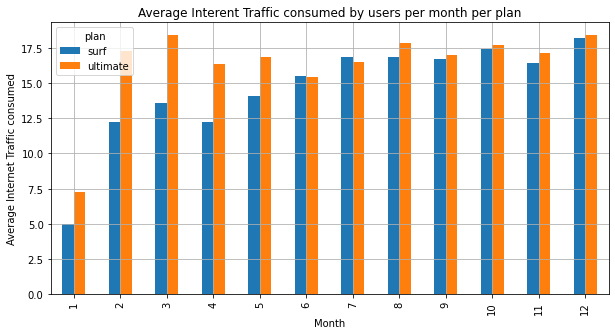

In [77]:
#Plotting a bar plot to visualize the average internet traffic consumed by users per month per plan

df_monthly_data.pivot_table(index = "month", columns = "plan",
                            values = "monthly_data",
                            aggfunc = "mean").plot(kind = "bar", grid = True, figsize = (10, 5))
plt.title("Average Interent Traffic consumed by users per month per plan")
plt.xlabel("Month")
plt.ylabel("Average Internet Traffic consumed")
plt.show()

The average monthly data consumed by users of both plans was lowest in January. The month where it was highest for both users is December. In March, however, the amount of data consumed by users on the ultimate plan was just as high as that which was consumed in December. Generally, throughout 2018, the data consumed by the users on the ultimate plan was much more than those on the surf plan.

**Analysis on the internet data consumed by users per Month on the Surf plan**

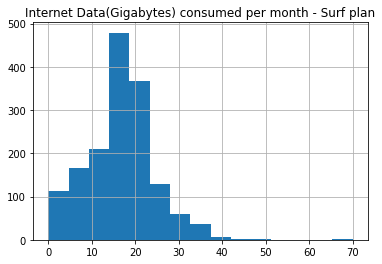

In [78]:
# Displaying the volume of internet data consumed by users per Month using the Surf plan
# Getting the data for users on the surf plan 

surf_cut = df_monthly_data.query('plan == "surf"')

#Plotting a Histogram
surf_cut["monthly_data"].hist(bins = 15)

plt.title("Internet Data(Gigabytes) consumed per month - Surf plan")

plt.show()

In [79]:
#Calculating the variance of the Internet Data Consumed by users on the "surf" plan

np.var(surf_cut["monthly_data"])


61.54444942447023

In [80]:
#Calculating the mean and the standard deviation 
surf_cut["monthly_data"].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: monthly_data, dtype: float64

We observe a peak at 15Gb per month with typical usage ranging from around 5GB to 25GB. There are outlier values showing users that use about 70GB monthly. The mean is lower than the median. Therefore, the histogram is negatively skewed.

**Analysis on the internet data consumed by users per Month on the Ultimate plan**

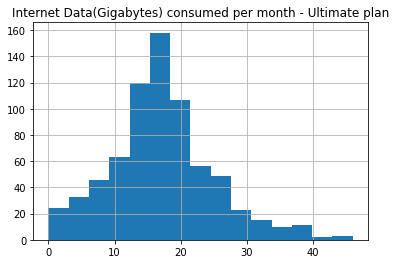

In [81]:
# Displaying the number of internet data consumed by users per Month using the Ultimate plan
# Getting the data for users on the surf plan 

ultimate_cut = df_monthly_data.query('plan == "ultimate"')

#Plotting a Histogram
ultimate_cut["monthly_data"].hist(bins = 15)

plt.title("Internet Data(Gigabytes) consumed per month - Ultimate plan")

plt.show()

In [82]:
#Calculating the variance of the Internet Data consumed per month for the "ultimate" plan

np.var(ultimate_cut["monthly_data"])


58.748840663580246

In [83]:
#Calculating the mean and the standard deviation for the Volume of data consumed by users of the "ultimate" 
#plan per month

ultimate_cut["monthly_data"].describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: monthly_data, dtype: float64

Just like the users of the surf plan, a peak is observed at 15Gb per month with typical usage ranging from around 10GB to 25GB. The mean and the median are the same. That shows that the histogram is normally distributed.

<AxesSubplot:title={'center':'monthly_data'}, xlabel='month'>

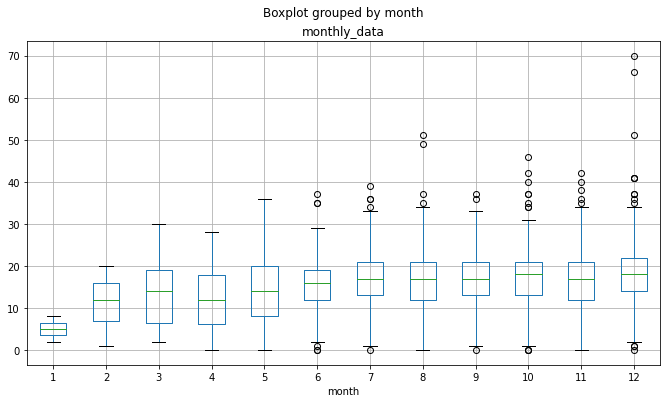

In [84]:
# Using a boxplot to visualize the distribution of the internet traffic consumed by users on the "surf" plan per month

(df_monthly_data.query('plan == "surf"')).boxplot(column = "monthly_data" , by = "month"  , figsize = (11, 6))
    

Taking a look at the volume of data consumed by the users on the surf plan as displayed by the boxplots. The month that shows the least data consumed by such users is January, and the month with the highest data consumed is December.

<AxesSubplot:title={'center':'monthly_data'}, xlabel='month'>

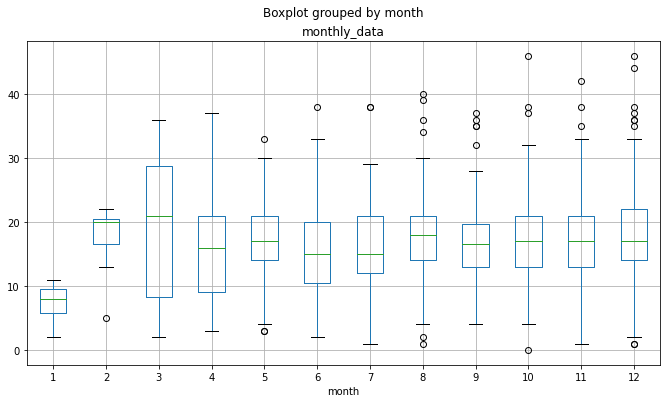

In [85]:
# Using a boxplot to visualize the distribution of the internet traffic consumed by users on the "ultimate" plan per month

(df_monthly_data.query('plan == "ultimate"')).boxplot(column = "monthly_data" , by = "month"  , figsize = (11, 6))
    

The volume of internet data consumed by users on the ultimate plan is lowest in January, and highest in March.

## Revenue

Calclulating the Revenue made by Megaline from users on the two different plans.

In [86]:
df_monthly_data.head(5)

,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data,first_name,last_name,city,plan,monthly_profit
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,12,56.0,412.0,44.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
3,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
4,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09


Calclulating the Revenue made by Megaline from users on the surf plan.

In [87]:
#Calculating the total revenue made by Megaline from users on the surf plan
surf_cut["monthly_profit"].sum()

95491.18

Calculating the total revenue made by Megaline from users on the ultimate plan

In [88]:
#Calculating the total revenue made by Megaline from users on the ultimate plan
ultimate_cut["monthly_profit"].sum()

52066.0

Displaying the total revenue for users on both plans for each month of the year

In [89]:
df_monthly_data.pivot_table(index = "month", columns = "plan", values = "monthly_profit", aggfunc ="sum")


plan,surf,ultimate
month,,
1,40.00,280.0
2,309.57,490.0
3,1056.65,896.0
4,2035.53,1533.0
5,3667.37,2051.0
6,4779.80,3367.0
7,7583.56,4242.0
8,10356.85,5173.0
9,11304.67,6195.0


In January, and February, the Revenue made from users on the ultimate plan was higher than users on the surf plan. However, January is the month that records the lowest Revenue, which indicates that there was not much subscription in January. Subsequent months saw an increase in profits which was higher than the previous months. The highest Revenue was made by Megaline in December for users on both plans. This is indicative of the fact that as 2018 wore on, Megaline saw the number of clients that subscribed to their plans increase, and the peak was in December.

The total Revenue made by Megaline for users on the surf plan for 2018 is 95491.18, and the ultimate plan is 52066.

## Hypothesis Testing

### Hypothesis Test 1: "The average profit from users of the Ultimate and Surf calling plans differ"

The Null Hypothesis for this test will be that "The average revenue from users of the Ultimate and Surf calling plans does not differ". Therefore, our alternate hypothesis will be "The average revenue from users of Ultimate and Surf calling plans differ". The statistical test that will be used to prove the hypothesis will be "ttest", and the st.ttest_ind() method will be used to test for equality of averages between the two statistical populations.
The alpha value will be set at 0.05. The st.ttest_ind() returns a p-value which is compared to alpha = 0.05. 
If p-value is less than alpha, we reject the Null Hypothesis. If p-value is greater than alpha then we cannot reject the Null Hypothesis.
The first point of call will be to check if the variance of the two datasets are similar or widely disparate. To perform this Hypothesis, we would look at the "monthly_profit" column

In [90]:
#Calculating the variance of the profit for users using the ultimate plan

ultimate_var = df_monthly_data.query('plan == "ultimate"')

np.var(ultimate_var["monthly_profit"])

129.66814043209877

In [91]:
#Calculating the variance of the profit for users using the Surf plan

surf_var = df_monthly_data.query('plan == "surf"')

np.var(surf_var["monthly_profit"])

3065.8848438690247

The variance of both statistical populations are far apart

In [92]:
#Testing the Hypotheses

alpha = 0.05 #critical statistical significance

result_hyp_test = st.ttest_ind(surf_var["monthly_profit"], ultimate_var["monthly_profit"], equal_var = False)

print("p-value:", result_hyp_test.pvalue)

if result_hyp_test.pvalue < alpha:
    print("we reject the null hypothesis")
else:
    print("we cannot reject the null hypothesis")


p-value: 3.17039054811355e-15
we reject the null hypothesis


The p-value is much lower than the alpha value. This tells us that the average revenue from users of the Ultimate and Surf calling plans differs. Therefore, the Null Hypothesis is rejected.

### Hypothesis Test 2: "The average profit from users in the NY-NJ area is different from that of the users from the other regions"

The Null Hypothesis for this test will be that "The average revenue from users in the NY-NJ area is not different from that of the users of other regions". Therefore, our alternate hypothesis will be "The average revenue from users in the NY-NJ area is different from that of the users of other regions". The alpha value will be set at 0.05. If p-value is less than alpha, we reject the Null Hypothesis. If p-value is greater than alpha then we cannot reject the Null Hypothesis. 

In [93]:
df_monthly_data.head(5)

,user_id,month,calls_per_month,mins_per_month,msg_per_month,monthly_data,first_name,last_name,city,plan,monthly_profit
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,182.0,30.0,7.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,12,56.0,412.0,44.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
3,1001,11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
4,1001,10,65.0,393.0,53.0,22.0,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09


In [94]:
#First, we check to see how all the cities are written

df_monthly_data['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [95]:
NY_NJ_City = df_monthly_data[df_monthly_data['city'].str.contains('NY')]

print(NY_NJ_City.shape)

(406, 11)


In [96]:
NY_NJ_City['city'].unique()

array(['New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Buffalo-Cheektowaga, NY MSA', 'Albany-Schenectady-Troy, NY MSA',
       'Rochester, NY MSA'], dtype=object)

Filterting out all the rows where NY, and NJ is found in the city column

In [97]:
#Filtering out all the regions located in New Jersey and New York

NY_NJ_City = df_monthly_data[df_monthly_data['city'].str.contains('NY')]

#Filtering out all the other regions that are not located in New Jersey and New York

Other_regions = df_monthly_data[~ df_monthly_data['city'].str.contains("NY")]

In [98]:
#Calculating the variance of the revenue made from cities in New Jersey and New York

np.var(NY_NJ_City["monthly_profit"])

1992.0005841078403

In [99]:
#Calculating the variance of the monthly profit from other regions other than those located in New York, and New Jersey

np.var(Other_regions["monthly_profit"])

2208.762114634395

The variance of both statistical populations are quite close

In [100]:
#Testing the Hypotheses

alpha = 0.05 #critical statistical significance

NY_NJ_hyp_test = st.ttest_ind(NY_NJ_City["monthly_profit"], Other_regions["monthly_profit"], equal_var = True)

print("p-value:", NY_NJ_hyp_test.pvalue)

if NY_NJ_hyp_test.pvalue < alpha:
    print("we reject the null hypothesis")
else:
    print("we cannot reject the null hypothesis")


p-value: 0.10065559377767883
we cannot reject the null hypothesis


The p-value is higher than the alpha value. This tells us that the average revenue from users in the NY-NJ area is not different from that of the users of other regions. 
Therefore, we cannot reject the null hypothesis.

## General conclusion


We analyzed the minutes of phone calls per month, messages sent per month, and the volume of data consumed per month by users on both the surf and ultimate plans, and it was discovered that they have similar behaviour. The average monthly minutes for phone calls in 2018 was lowest in January, and increased gradually until July. After which the average monthly minutes remained somewhat constant and finally peaked in December. The users of the surf plan spent more time calling in December than users on the ultimate plan.

The duration of the calls for most users on the surf plan, is between 200 and 600 minutes. While, the duration of the calls for most users on the ultimate plan, is between 300 and 550 minutes monthly. 

The average monthly messages sent by users in 2018 was lowest in January, and increased gradually until December which was the highest. In all the months, the users on the ultimate plan sent more messages than users on the surf plan. For both plans, however, a steady decrease is observed, with the peak ranging from 0 to about 10 messages in a month. This means that more people text less, and less people text more.

The average monthly data consumed by users of both plans was lowest in January. The month where it was highest for both users is December. In March, however, the amount of data consumed by users on the ultimate plan was just as high as that which was consumed in December. Throughout the year, the data consumed by the users on the ultimate plan was much more than those on the surf plan. The typical usage of the Internet data ranges from around 5GB to 25GB for users on the surf plan, and 10GB to 25GB for users on the ultimate plan. 

Two t-tests were performed to test our hypotheses. The null hypothesis for the first test "The average revenue from users of the Ultimate and Surf calling plans does not differ" was rejected. When the total revenue made from both plans was calculated for the whole year, users on the surf plan brought in 95491.18, while users on the ultimate plan generated 52066 for Megaline.

However, we did not find any grounds to reject the null hypothesis for the second t-test "The average revenue from users in the NY-NJ area is not different from that of the users of other regions".  

After working on the data provided by Megaline for their clients in the year 2018, the surf plan was found to be more profitable.